In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  --- Basit Doğrusal Regresyon ---

In [2]:
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [4]:
df.corr()

C:\Users\fr\AppData\Local\Temp\ipykernel_15400\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


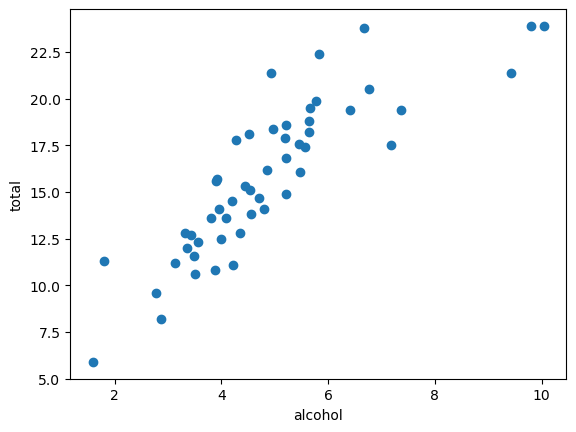

In [5]:
plt.scatter(df.alcohol,df.total)
plt.xlabel("alcohol")
plt.ylabel("total")
plt.show()

In [16]:
x = df[["alcohol"]]
y = df.total

In [17]:
x

,alcohol
0,5.640
1,4.525
2,5.208
3,5.824
4,3.360
5,3.808
6,3.888
7,4.860
8,1.593
9,5.191


In [18]:
y

0     18.8
1     18.1
2     18.6
3     22.4
4     12.0
5     13.6
6     10.8
7     16.2
8      5.9
9     17.9
10    15.6
11    17.5
12    15.3
13    12.8
14    14.5
15    15.7
16    17.8
17    21.4
18    20.5
19    15.1
20    12.5
21     8.2
22    14.1
23     9.6
24    17.6
25    16.1
26    21.4
27    14.9
28    14.7
29    11.6
30    11.2
31    18.4
32    12.3
33    16.8
34    23.9
35    14.1
36    19.9
37    12.8
38    18.2
39    11.1
40    23.9
41    19.4
42    19.5
43    19.4
44    11.3
45    13.6
46    12.7
47    10.6
48    23.8
49    13.8
50    17.4
Name: total, dtype: float64

In [3]:
from sklearn.linear_model import LinearRegression

In [20]:
lrModel = LinearRegression()

In [21]:
lrModel.fit(x,y)

LinearRegression()

In [22]:
b0 = lrModel.intercept_
b0

5.8577761548263005

In [25]:
lrModel.predict([[0]])

C:\Users\fr\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.85777615])

In [23]:
b1 = lrModel.coef_
b1

array([2.0325063])

In [ ]:
#  y(y_head) = 5.8 + 2.03 * x

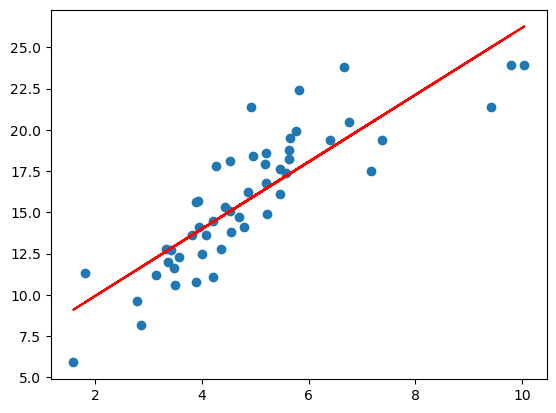

In [29]:
y_head = lrModel.predict(x)
plt.scatter(x,y)
plt.plot(x,y_head,color="r")
plt.show()

In [31]:
lrModel.score(x,y)

0.7269492966665405

In [4]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y,y_head)

0.7269492966665405

# --- Çoklu Doğrusal Regresyon ---

In [34]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [36]:
df.drop("abbrev", axis=1, inplace=True)

In [37]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [42]:
X = df.drop("total", axis=1)
Y = df.total

In [5]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y test_size=0.2, random_state=42)

In [46]:
X_train.shape

(40, 6)

In [47]:
X_train

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
8,2.006,1.593,5.900,5.900,1273.89,136.05
49,4.968,4.554,5.382,11.592,670.31,106.62
6,4.968,3.888,9.396,8.856,1068.73,167.02
47,4.452,3.498,8.692,9.116,890.03,111.62
4,4.200,3.360,10.920,10.680,878.41,165.63
36,6.368,5.771,18.308,18.706,881.51,178.86
33,6.552,5.208,15.792,13.608,708.24,127.82
19,5.738,4.530,13.137,12.684,661.88,96.57
48,8.092,6.664,23.086,20.706,992.61,152.56
15,2.669,3.925,15.229,13.659,649.06,114.47


In [48]:
X_test.shape

(11, 6)

In [49]:
Y_train.shape

(40,)

In [51]:
Y_test.shape

(11,)

In [52]:
?train_test_split

In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [56]:
linear_model.intercept_

2.164358167810743

In [57]:
linear_model.coef_

array([ 0.09054578,  0.41440262,  0.20883668,  0.65813416, -0.00223407,
        0.00705813])

 y = 2.16 +(0.09)*speeding + (0.41) * alcohol + ... + (0.007)*0ins_losses

In [6]:
from sklearn.metrics import mean_squared_error

In [60]:
rmse = np.sqrt(mean_squared_error(Y_train,linear_model.predict(X_train)))
rmse

0.637417054846497

In [61]:
rmse = np.sqrt(mean_squared_error(Y_test,linear_model.predict(X_test)))
rmse

1.4785852466056706

In [63]:
?mean_squared_error

In [65]:
pred = linear_model.predict(X_test)
pred

array([19.57900395, 23.48158389, 12.83366201, 16.23564923, 15.71265403,
       17.89063449, 17.78063461, 11.03666255, 22.50195013,  9.60771152,
       14.1728825 ])

In [66]:
Y_test

43    19.4
40    23.9
46    12.7
12    15.3
24    17.6
31    18.4
17    21.4
32    12.3
3     22.4
30    11.2
13    12.8
Name: total, dtype: float64

In [72]:
df_pred = pd.DataFrame(pred,columns=["predicted_values"])
df_pred["real_values"] = Y_test.values
df_pred

,predicted_values,real_values
0,19.579004,19.4
1,23.481584,23.9
2,12.833662,12.7
3,16.235649,15.3
4,15.712654,17.6
5,17.890634,18.4
6,17.780635,21.4
7,11.036663,12.3
8,22.501950,22.4
9,9.607712,11.2


# --- Karar Ağacı Algoritması ---

In [6]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
x = df.drop("total", axis=1)
y = df.total

In [8]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [9]:
X_train

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
6,4.968,3.888,9.396,8.856,1068.73,167.02,CT
47,4.452,3.498,8.692,9.116,890.03,111.62,WA
4,4.200,3.360,10.920,10.680,878.41,165.63,CA
36,6.368,5.771,18.308,18.706,881.51,178.86,OK
33,6.552,5.208,15.792,13.608,708.24,127.82,NC
19,5.738,4.530,13.137,12.684,661.88,96.57,ME
48,8.092,6.664,23.086,20.706,992.61,152.56,WV
15,2.669,3.925,15.229,13.659,649.06,114.47,IA
9,3.759,5.191,16.468,16.826,1160.13,144.18,FL
16,4.806,4.272,13.706,15.130,780.45,133.80,KS


In [10]:
X_train = X_train['alcohol']
X_test= X_test['alcohol']

In [11]:
X_train.shape

(38,)

In [12]:
X_test.shape

(13,)

In [13]:
Y_train.shape

(38,)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_model = DecisionTreeRegressor()
# X_train ve Y_train veri setlerini 2D dizilere dönüştürün
X_train_reshaped = X_train.values.reshape(-1, 1)
Y_train_reshaped = Y_train.values.reshape(-1, 1)

# Modeli eğitin
dt_model.fit(X_train_reshaped, Y_train_reshaped)

DecisionTreeRegressor()

In [16]:
X_test_reshaped = X_test.values.reshape(-1, 1)
pred = dt_model.predict(X_test_reshaped )

In [17]:
pred

array([17.5, 23.9, 11.6, 18.1, 16.1, 16.2, 16.2, 10.6, 19.9, 12.8, 17.8,
       11.3, 15.1])

In [18]:
Y_test

43    19.4
40    23.9
46    12.7
12    15.3
24    17.6
31    18.4
17    21.4
32    12.3
3     22.4
30    11.2
13    12.8
8      5.9
49    13.8
Name: total, dtype: float64

In [19]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
rmse

NameError: name 'mean_squared_error' is not defined

In [70]:
#X_grid = np.array(np.arange(min(X_train.values),max(X_train.Values),0.01))
#X_grid

In [20]:
#yukardaki kod çalışmadı yerine aşağıdaki yöntem eklendi
# alınan hata ektedir

#ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
X_train

6      3.888
47     3.498
4      3.360
36     5.771
33     5.208
19     4.530
48     6.664
15     3.925
9      5.191
16     4.272
26     9.416
44     1.808
25     5.474
11     7.175
0      5.640
45     4.080
27     5.215
34    10.038
5      3.808
29     3.480
37     3.328
1      4.525
21     2.870
2      5.208
39     4.218
35     4.794
23     2.784
41     6.402
10     3.900
22     3.948
18     6.765
50     5.568
20     4.000
7      4.860
42     5.655
14     4.205
28     4.704
38     5.642
Name: alcohol, dtype: float64

In [21]:
# X_train veri çerçevesinden "column_name" adlı sütunu kullanarak minimum ve maksimum değerleri alın
min_value = X_train.min()
max_value = X_train.max()

# Dizi oluştururken başlangıç, bitiş ve adım değerlerini belirleyin
X_grid = np.arange(min_value, max_value, 0.01)
X_grid

array([ 1.808,  1.818,  1.828,  1.838,  1.848,  1.858,  1.868,  1.878,
        1.888,  1.898,  1.908,  1.918,  1.928,  1.938,  1.948,  1.958,
        1.968,  1.978,  1.988,  1.998,  2.008,  2.018,  2.028,  2.038,
        2.048,  2.058,  2.068,  2.078,  2.088,  2.098,  2.108,  2.118,
        2.128,  2.138,  2.148,  2.158,  2.168,  2.178,  2.188,  2.198,
        2.208,  2.218,  2.228,  2.238,  2.248,  2.258,  2.268,  2.278,
        2.288,  2.298,  2.308,  2.318,  2.328,  2.338,  2.348,  2.358,
        2.368,  2.378,  2.388,  2.398,  2.408,  2.418,  2.428,  2.438,
        2.448,  2.458,  2.468,  2.478,  2.488,  2.498,  2.508,  2.518,
        2.528,  2.538,  2.548,  2.558,  2.568,  2.578,  2.588,  2.598,
        2.608,  2.618,  2.628,  2.638,  2.648,  2.658,  2.668,  2.678,
        2.688,  2.698,  2.708,  2.718,  2.728,  2.738,  2.748,  2.758,
        2.768,  2.778,  2.788,  2.798,  2.808,  2.818,  2.828,  2.838,
        2.848,  2.858,  2.868,  2.878,  2.888,  2.898,  2.908,  2.918,
      

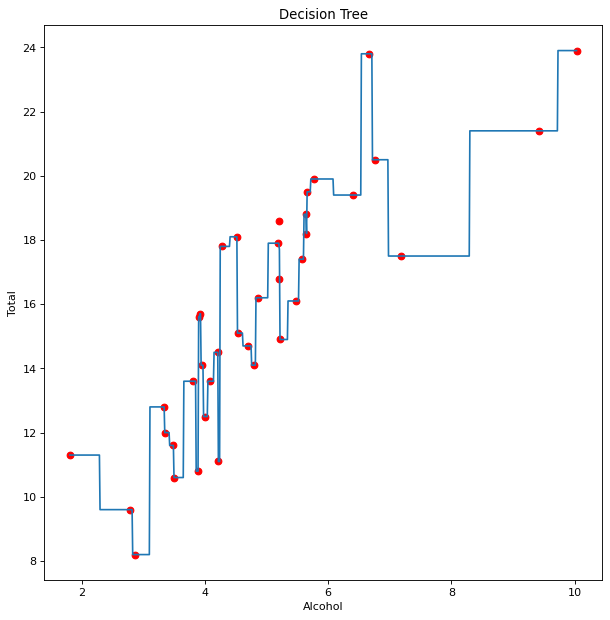

In [22]:
X_grid=X_grid.reshape(-1,1)
plt.figure(figsize=(9, 9), dpi=80)

plt.scatter(X_train, Y_train, color="r")
plt.plot(X_grid, dt_model.predict(X_grid))

plt.xlabel("Alcohol")
plt.ylabel("Total")
plt.title("Decision Tree")
plt.show()


# Random Forest

In [23]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [30]:
df.drop("abbrev",axis=1,inplace=True)
x=df.drop("total",axis=1)
y=df.total

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [35]:
?RandomForestRegressor

In [37]:
pred = rf.predict(X_test)
pred

array([19.4885, 21.8815, 12.425 , 16.894 , 16.5255, 17.408 , 18.0315,
       11.652 , 22.08  , 10.5085, 13.788 ,  8.987 , 12.7595])

In [38]:
Y_test.values

array([19.4, 23.9, 12.7, 15.3, 17.6, 18.4, 21.4, 12.3, 22.4, 11.2, 12.8,
        5.9, 13.8])

# Clasification

# Lojistik fonksiyon

In [9]:
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
data.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lbl = LabelEncoder()
data.sex = lbl.fit_transform(data.sex)

In [17]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [18]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [19]:
data.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [20]:
data.species = lbl.fit_transform(data.species)
data.island = lbl.fit_transform(data.island)

In [21]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [22]:
y = data.sex
x = data.drop("sex",axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg=LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

In [58]:
?LogisticRegression

In [25]:
log_reg.intercept_

array([0.00046869])

In [26]:
log_reg.coef_

array([[-0.20419574,  0.11625574,  0.15257895,  0.78723299, -0.22424653,
         0.00595536]])

In [27]:
log_reg.predict(x)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [28]:
y.values

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
cm = confusion_matrix(y,log_reg.predict(x))
cm

array([[134,  31],
       [ 26, 142]], dtype=int64)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

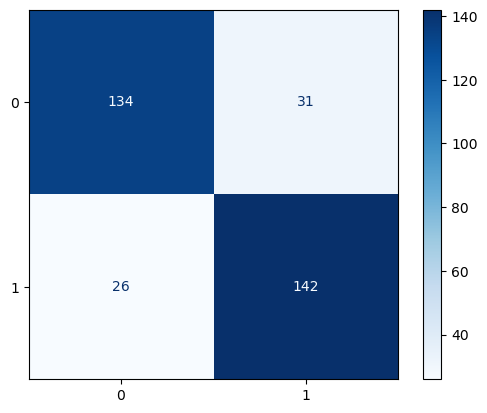

In [31]:
species_labels = data['species'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_labels)

# Matrisi çizdirelim
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix")
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y,log_reg.predict(x))

0.8288288288288288

# -- KNN ---

In [35]:
df = data.copy()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [36]:
y = df.sex
x = df.drop("sex",axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
?KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [45]:
Y_test.values

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [46]:
accuracy_score(Y_test,y_pred)

0.83

In [48]:
cm2 = confusion_matrix(Y_test,y_pred)
cm2

array([[38, 10],
       [ 7, 45]], dtype=int64)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

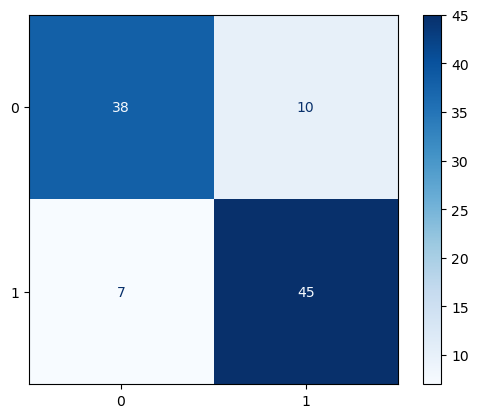

In [101]:
species_labels = data['species'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_labels)

# Matrisi çizdirelim
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



# --- SVM (Support Vector Machine) ---

In [53]:
y = df.sex
x = df.drop("sex",axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
from sklearn.svm import SVC

In [62]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [63]:
y_pred = svm_model.predict(X_test)

In [64]:
accuracy_score(Y_test,y_pred)

0.9

In [65]:
cm3 = confusion_matrix(Y_test,y_pred)
cm3

array([[43,  5],
       [ 5, 47]], dtype=int64)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

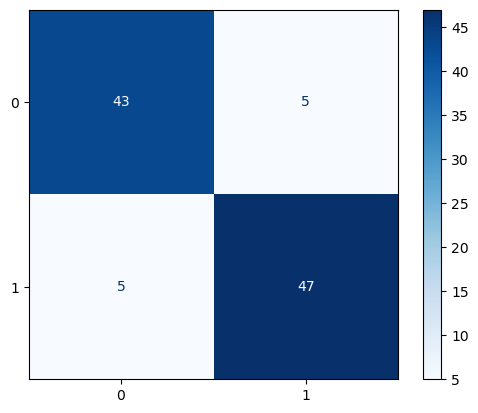

In [66]:
species_labels = data['species'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=species_labels)

# Matrisi çizdirelim
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix")
plt.show()

In [67]:
df.species.unique()

array([0, 1, 2])

In [69]:
y_ = df.species
x_ = df.drop("species",axis=1)

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(x_,y_,test_size=0.3,random_state=52)

In [76]:
svm = SVC(kernel="linear")
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [77]:
accuracy_score(Y_test,svm.predict(X_test))


1.0

In [79]:
cm4 = confusion_matrix(Y_test,svm.predict(X_test))
cm4

array([[46,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 37]], dtype=int64)

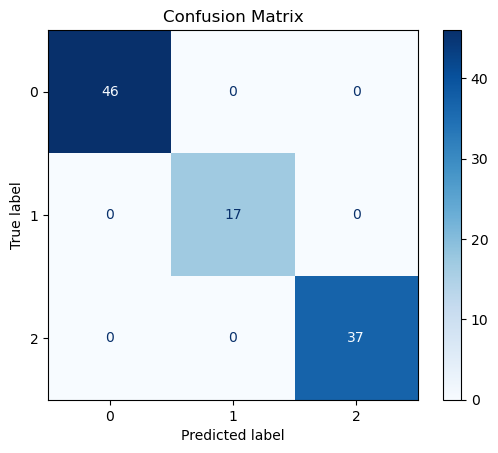

In [80]:
species_labels = data['species'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=species_labels)

# Matrisi çizdirelim
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix")
plt.show()

# --- Karar Ağacı Sınıflandırması ---

In [81]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [82]:
y_ = df.species
x_ = df.drop("species",axis=1)

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(x_,y_,test_size=0.3,random_state=101)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
d_t = DecisionTreeClassifier()
d_t.fit(X_train,Y_train)

DecisionTreeClassifier()

In [89]:
pred= d_t.predict(X_test)
pred

array([1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2,
       1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1])

In [90]:
Y_test.values

array([1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1])

In [93]:
accuracy_score(Y_test,pred)

0.95

In [95]:
cm5 = confusion_matrix(Y_test,pred)
cm5

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]], dtype=int64)

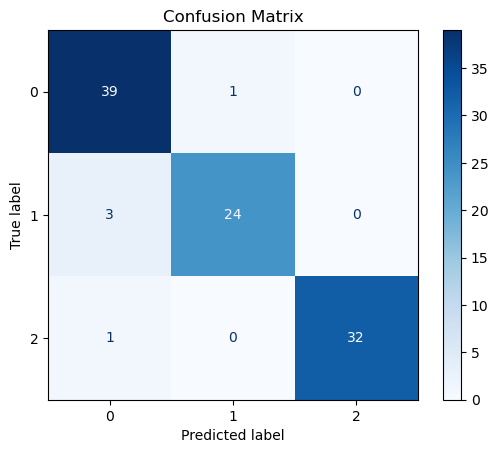

In [96]:
species_labels = data['species'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=species_labels)

# Matrisi çizdirelim
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix")
plt.show()

In [97]:
from sklearn.tree import plot_tree

[Text(0.5714285714285714, 0.9, 'flipper_length_mm <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.35714285714285715, 0.7, 'bill_length_mm <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.14285714285714285, 0.5, 'bill_length_mm <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.07142857142857142, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.21428571428571427, 0.3, 'bill_depth_mm <= 17.45\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5714285714285714, 0.5, 'island <= 1.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.5, 0.3, 'body_mass_g <= 4575.0\ngini = 0.051\nsamples = 38\nvalue = [1, 37, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\

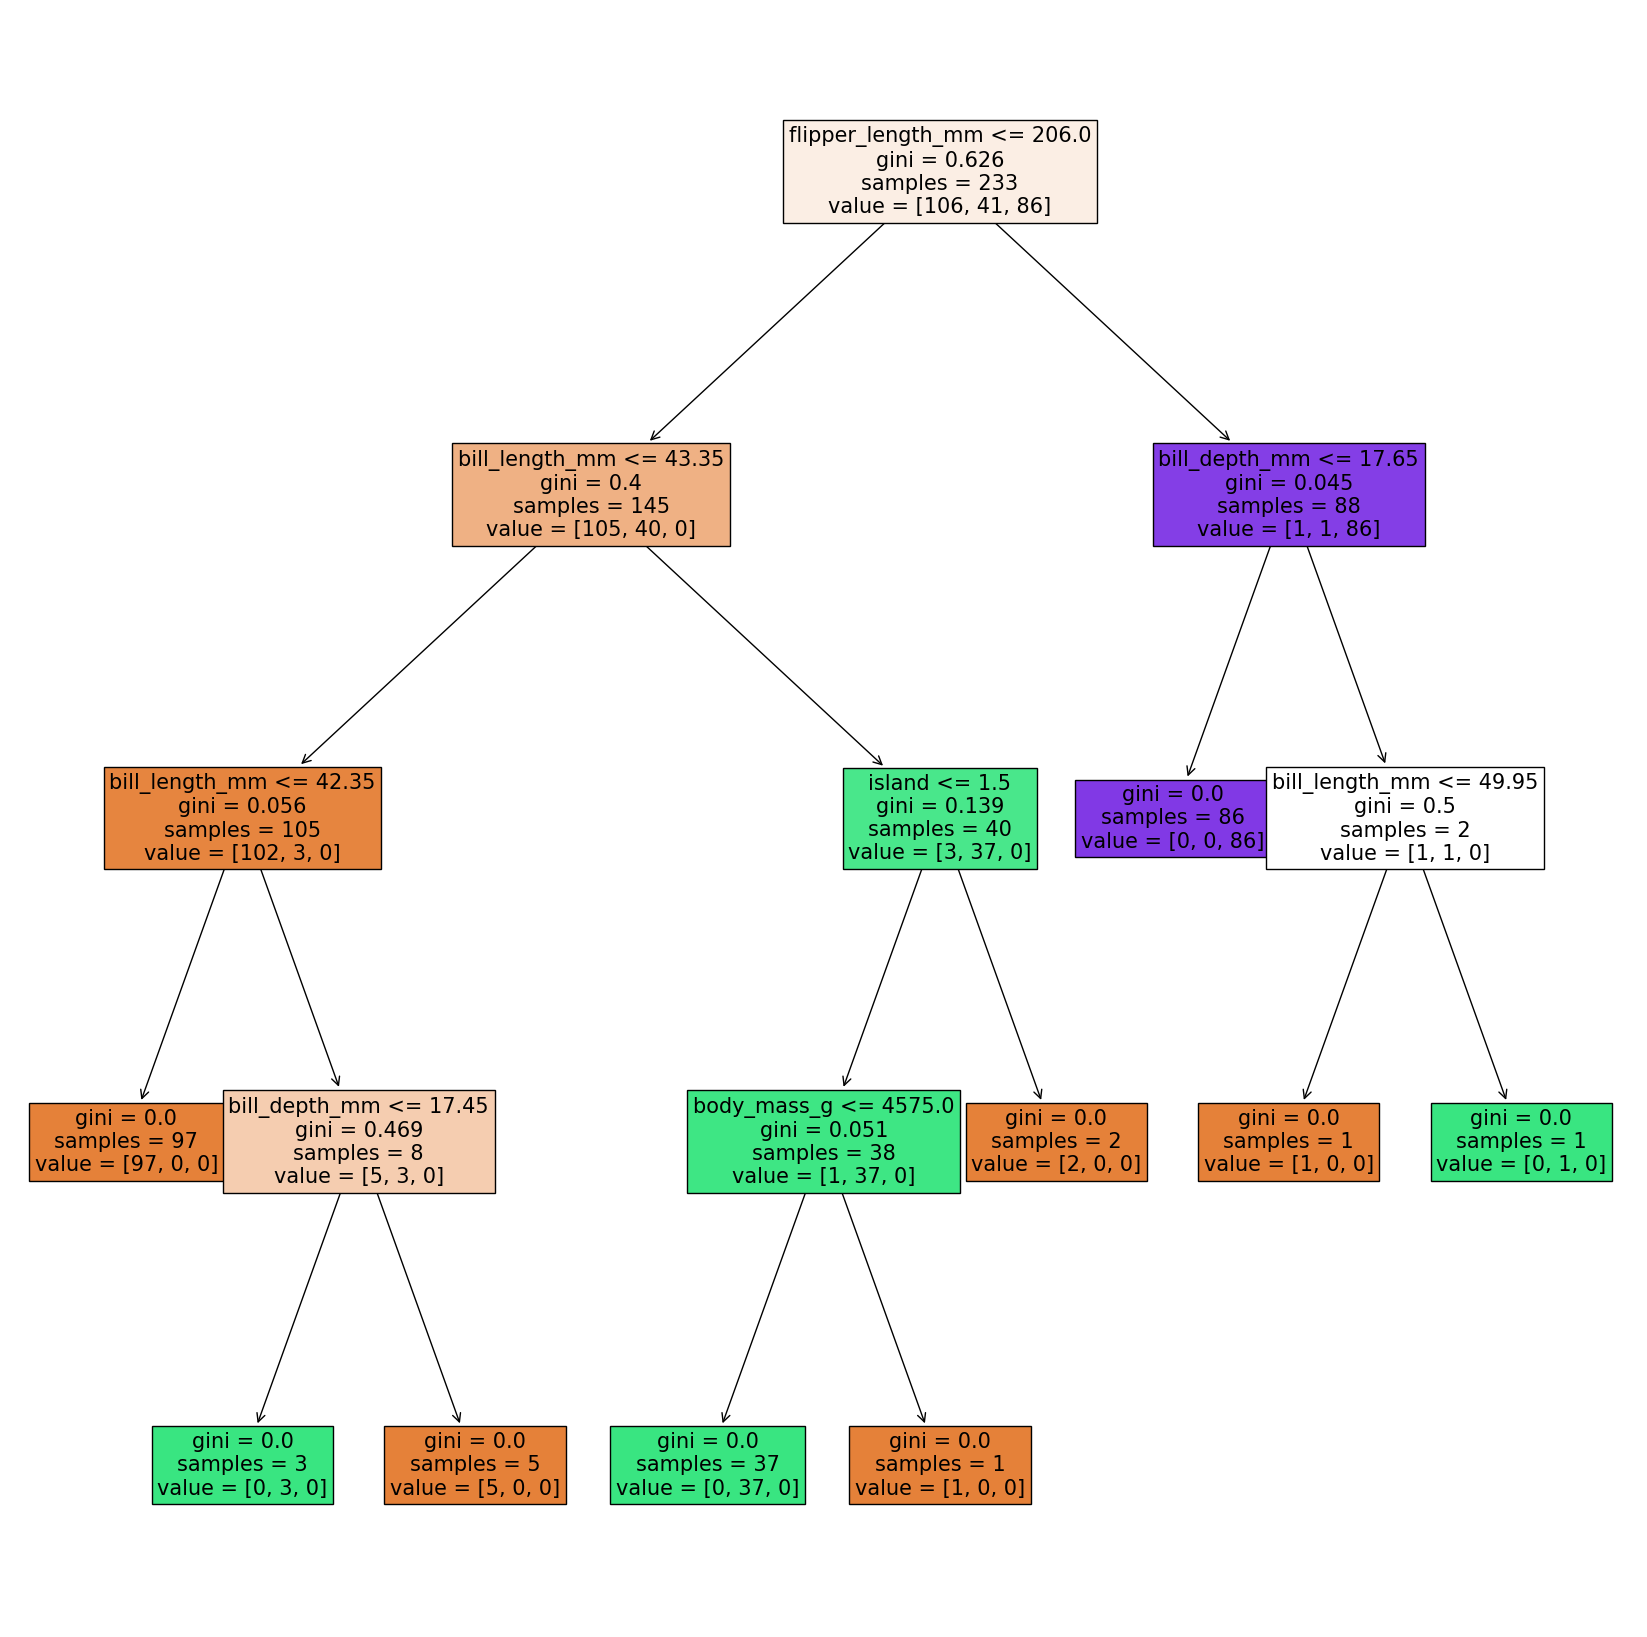

In [100]:
plt.figure(figsize=(21,21))
plot_tree(d_t,feature_names = x_.columns, filled=True, fontsize=15)